# **Intro**

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Datasets

/content/drive/MyDrive/Colab Notebooks/Datasets


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas_profiling
import dtale
import dtale.app as dtale_app

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install -U dtale
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Datasets


In [ ]:
!ls

 CarPrice_Assignment.csv       Drivery.xlsx	 minidata_dogs.csv
 cars_corrproject.csv	       Flowers.csv	'Practical Statistics'
'countries of the world.csv'   Flowers.xlsx
 Drivery.csv		      'Heart data.csv'


In [ ]:
# Import data
table = pd.read_csv('Heart data.csv')
table.head(10)

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0                 63    1           1           145.0         233.0   
1                 37    1           3           130.0         250.0   
2                 41    0           2           130.0         204.0   
3                 56    1           2           120.0         236.0   
4                 57    0           4           120.0         354.0   
5                 57    1           4           140.0         192.0   
6                 56    0           2           140.0         294.0   
7                 44    1           2           120.0         263.0   
8                 52    1           3           172.0         199.0   
9                 57    1           3           150.0         168.0   

   blood sugar  electrocardiographic   heart rate  exercise induced  \
0          1.0                    2.0       150.0               0.0   
1          0.0                    0.0       187.0               0.0   
2          0.0                    2.0       172.0               0.0   
3          0.0                    0.0       178.0               0.0   
4          0.0                    0.0       163.0               1.0   
5          0.0                    0.0       148.0               0.0   
6          0.0                    2.0       153.0               0.0   
7          0.0                    0.0       173.0               0.0   
8          1.0                    0.0       162.0               0.0   
9          0.0                    0.0       174.0               0.0   

   depression   slope   ca  thal  c  
0          2.3    3.0  0.0   6.0  0  
1          3.5    3.0  0.0   3.0  0  
2          1.4    1.0  0.0   3.0  0  
3          0.8    1.0  0.0   3.0  0  
4          0.6    1.0  0.0   3.0  0  
5          0.4    2.0  0.0   6.0  0  
6          1.3    2.0  0.0   3.0  0  
7          0.0    1.0  0.0   7.0  0  
8          0.5    1.0  0.0   7.0  0  
9          1.6    1.0  0.0   3.0  0

In [ ]:
table.shape

(597, 14)

In [ ]:
pd.DataFrame(table.columns.values, columns= ['Columns'])


Columns
0       Age (age in year)
1                     sex
2              chest pain
3          blood pressure
4            cholestoral 
5             blood sugar
6   electrocardiographic 
7              heart rate
8        exercise induced
9             depression 
10                  slope
11                     ca
12                   thal
13                      c

# **Missing Data Handeling**

In [ ]:
table.isnull().sum()

Age (age in year)          0
sex                        0
chest pain                 0
blood pressure             1
cholestoral               23
blood sugar                8
electrocardiographic       1
heart rate                 1
exercise induced           1
depression                 0
slope                    190
ca                       294
thal                     268
c                          0
dtype: int64

In [ ]:
table.isnull().mean() * 100

Age (age in year)         0.000000
sex                       0.000000
chest pain                0.000000
blood pressure            0.167504
cholestoral               3.852596
blood sugar               1.340034
electrocardiographic      0.167504
heart rate                0.167504
exercise induced          0.167504
depression                0.000000
slope                    31.825796
ca                       49.246231
thal                     44.891122
c                         0.000000
dtype: float64

In [ ]:
# Fill missing data with .mean()

table2 = table.fillna(table.mean())
table2.isnull().sum()

Age (age in year)        0
sex                      0
chest pain               0
blood pressure           0
cholestoral              0
blood sugar              0
electrocardiographic     0
heart rate               0
exercise induced         0
depression               0
slope                    0
ca                       0
thal                     0
c                        0
dtype: int64

In [ ]:
# (axis = 1) searches for null data in the rows
# (axis = 0) searches for null data in the columns

table.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
592    2
593    2
594    2
595    3
596    2
Length: 597, dtype: int64

In [ ]:
table.isnull().any(axis = 0).sum()

9

In [ ]:
# Fill missing data with .mean()

table3 = table.copy()
table3[['blood pressure', 'cholestoral ']] = table3[['blood pressure', 'cholestoral ']].fillna(table3[['blood pressure', 'cholestoral ']].mean())
table3.isnull().sum()

Age (age in year)          0
sex                        0
chest pain                 0
blood pressure             0
cholestoral                0
blood sugar                8
electrocardiographic       1
heart rate                 1
exercise induced           1
depression                 0
slope                    190
ca                       294
thal                     268
c                          0
dtype: int64

In [ ]:
# Sample statistical opertaions

print(table.min())
print('------')
print(table.max())
print('------')
print(table.mean())
print('------')
print(table.std())
print('------')
print(table.median())

Age (age in year)        28.0
sex                       0.0
chest pain                1.0
blood pressure           92.0
cholestoral              85.0
blood sugar               0.0
electrocardiographic      0.0
heart rate               71.0
exercise induced          0.0
depression                0.0
slope                     1.0
ca                        0.0
thal                      3.0
c                         0.0
dtype: float64
------
Age (age in year)         77.0
sex                        1.0
chest pain                 4.0
blood pressure           200.0
cholestoral              603.0
blood sugar                1.0
electrocardiographic       2.0
heart rate               202.0
exercise induced           1.0
depression                 6.2
slope                      3.0
ca                         9.0
thal                       7.0
c                          1.0
dtype: float64
------
Age (age in year)         51.182580
sex                        0.701843
chest pain                 3.0

In [ ]:
table.describe()

Age (age in year)         sex  chest pain  blood pressure  \
count         597.000000  597.000000  597.000000      596.000000   
mean           51.182580    0.701843    3.072027      132.129195   
std             9.074366    0.457833    0.965776       17.603812   
min            28.000000    0.000000    1.000000       92.000000   
25%            44.000000    0.000000    2.000000      120.000000   
50%            52.000000    1.000000    3.000000      130.000000   
75%            58.000000    1.000000    4.000000      140.000000   
max            77.000000    1.000000    4.000000      200.000000   

       cholestoral   blood sugar  electrocardiographic   heart rate  \
count    574.000000   589.000000             596.000000  596.000000   
mean     248.655052     0.110357               0.610738  144.456376   
std       59.784805     0.313600               0.869358   23.794282   
min       85.000000     0.000000               0.000000   71.000000   
25%      211.000000     0.000000               0.000000  128.000000   
50%      242.500000     0.000000               0.000000  146.000000   
75%      278.750000     0.000000               2.000000  162.000000   
max      603.000000     1.000000               2.000000  202.000000   

       exercise induced  depression        slope          ca        thal  \
count        596.000000   597.000000  407.000000  303.000000  329.000000   
mean           0.315436     0.816248    1.675676    0.693069    4.811550   
std            0.465080     1.067938    0.572758    1.049212    1.928854   
min            0.000000     0.000000    1.000000    0.000000    3.000000   
25%            0.000000     0.000000    1.000000    0.000000    3.000000   
50%            0.000000     0.200000    2.000000    0.000000    3.000000   
75%            1.000000     1.500000    2.000000    1.000000    7.000000   
max            1.000000     6.200000    3.000000    9.000000    7.000000   

                c  
count  597.000000  
mean     0.410385  
std      0.492316  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [ ]:
# Missing data handeling by deleting features

table4 = table.dropna(thresh = 500, axis = 1)
print(table.shape, table4.shape)
# (thresh = 500) keep the features with at least 500 available datas, less than 97 NaN.

(597, 14) (597, 11)


In [ ]:
table4 = table.dropna(thresh = 12, axis = 0)
print(table.shape, table4.shape)
# features are fix and row with more than 12 NaN will be deleted

# (axis = 1) searches for null data in the rows
# (axis = 0) searches for null data in the columns


(597, 14) (415, 14)


In [ ]:
# Define NaN

table[table == '?'] = np.nan
#consider '?' as NaN

In [ ]:
# 'Ca' is one of the feauters

table.ca.value_counts()

0.0    179
1.0     65
2.0     38
3.0     20
9.0      1
Name: ca, dtype: int64

In [ ]:
# Change certain values

table['ca'][table['ca'] == 9] = 0

#table['ca'] = table.ca[]
# second method not good when there in space in the names of columns



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
table.ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [ ]:
# Find and display Missing Data
xx = pd.isnull(table['heart rate'])
table[xx]

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
347                 48    0           2             NaN         308.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
347          0.0                    1.0         NaN               NaN   

     depression   slope  ca  thal  c  
347          2.0    1.0 NaN   NaN  0

In [ ]:
# Cutting and displaying

table.iloc[346:349]

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
346                 53    1           2           120.0           NaN   
347                 48    0           2             NaN         308.0   
348                 36    1           2           120.0         166.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
346          0.0                    0.0       132.0               0.0   
347          0.0                    1.0         NaN               NaN   
348          0.0                    0.0       180.0               0.0   

     depression   slope  ca  thal  c  
346          0.0    NaN NaN   NaN  0  
347          2.0    1.0 NaN   NaN  0  
348          0.0    NaN NaN   NaN  0

In [ ]:
# Forward Fill - 130 - X - 132 ---> 130 - 130 - 132

table5 = table['heart rate'].ffill()
table5[346:349]

# There exists also .bfill()

346    132.0
347    132.0
348    180.0
Name: heart rate, dtype: float64

In [ ]:
table5.isnull().sum()

0

In [ ]:
# Forward Fill - another way

table['heart rate'].fillna(method = 'ffill')

0      150.0
1      187.0
2      172.0
3      178.0
4      163.0
       ...  
592    134.0
593    135.0
594    118.0
595    135.0
596    122.0
Name: heart rate, Length: 597, dtype: float64

In [ ]:
# Which data in 'blood pressure is between 120 and 140.

table['blood pressure'].between(120,140)

0      False
1       True
2       True
3       True
4       True
       ...  
592     True
593     True
594     True
595     True
596    False
Name: blood pressure, Length: 597, dtype: bool

In [ ]:
# ~ ---> gives the opposite

table[~table['thal'].isin([4,6,7])]

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
1                   37    1           3           130.0         250.0   
2                   41    0           2           130.0         204.0   
3                   56    1           2           120.0         236.0   
4                   57    0           4           120.0         354.0   
6                   56    0           2           140.0         294.0   
..                 ...  ...         ...             ...           ...   
592                 52    1           4           140.0         266.0   
593                 43    1           4           140.0         288.0   
594                 41    1           4           120.0         336.0   
595                 44    1           4           135.0         491.0   
596                 49    1           4           150.0         222.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
1            0.0                    0.0       187.0               0.0   
2            0.0                    2.0       172.0               0.0   
3            0.0                    0.0       178.0               0.0   
4            0.0                    0.0       163.0               1.0   
6            0.0                    2.0       153.0               0.0   
..           ...                    ...         ...               ...   
592          0.0                    0.0       134.0               1.0   
593          0.0                    0.0       135.0               1.0   
594          0.0                    0.0       118.0               1.0   
595          0.0                    0.0       135.0               0.0   
596          0.0                    0.0       122.0               0.0   

     depression   slope   ca  thal  c  
1            3.5    3.0  0.0   3.0  0  
2            1.4    1.0  0.0   3.0  0  
3            0.8    1.0  0.0   3.0  0  
4            0.6    1.0  0.0   3.0  0  
6            1.3    2.0  0.0   3.0  0  
..           ...    ...  ...   ... ..  
592          2.0    2.0  NaN   NaN  1  
593          2.0    2.0  NaN   NaN  1  
594          3.0    2.0  NaN   NaN  1  
595          0.0    NaN  NaN   NaN  1  
596          2.0    2.0  NaN   NaN  1  

[441 rows x 14 columns]

In [ ]:
# all columns - selected rows

table.iloc[200:300 ,:].head(5)

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
200                 52    0           4           130.0         180.0   
201                 51    0           2           160.0         194.0   
202                 54    1           4           150.0         365.0   
203                 49    1           2           100.0         253.0   
204                 43    0           3           150.0           NaN   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
200          0.0                    0.0       140.0               1.0   
201          0.0                    0.0       170.0               0.0   
202          0.0                    1.0       134.0               0.0   
203          0.0                    0.0       174.0               0.0   
204          0.0                    0.0       175.0               0.0   

     depression   slope  ca  thal  c  
200          1.5    2.0 NaN   NaN  0  
201          0.0    NaN NaN   NaN  0  
202          1.0    1.0 NaN   NaN  0  
203          0.0    NaN NaN   NaN  0  
204          0.0    NaN NaN   3.0  0

In [ ]:
table.iloc[:5,-5:]

depression   slope   ca  thal  c
0          2.3    3.0  0.0   6.0  0
1          3.5    3.0  0.0   3.0  0
2          1.4    1.0  0.0   3.0  0
3          0.8    1.0  0.0   3.0  0
4          0.6    1.0  0.0   3.0  0

In [ ]:
# Choose all '1's from 'sex' column and devide their data in 'blood pressure' column
# and put in the 'blood pressure' again.

table6 = table.copy()
table6.loc[table6.sex==1, 'blood pressure']/=2
table6

# also works:
#table6.loc[table6.sex==1, 'blood pressure'] = table6.loc[table6.sex==1, 'blood pressure']/2

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0                   63    1           1            72.5         233.0   
1                   37    1           3            65.0         250.0   
2                   41    0           2           130.0         204.0   
3                   56    1           2            60.0         236.0   
4                   57    0           4           120.0         354.0   
..                 ...  ...         ...             ...           ...   
592                 52    1           4            70.0         266.0   
593                 43    1           4            70.0         288.0   
594                 41    1           4            60.0         336.0   
595                 44    1           4            67.5         491.0   
596                 49    1           4            75.0         222.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
0            1.0                    2.0       150.0               0.0   
1            0.0                    0.0       187.0               0.0   
2            0.0                    2.0       172.0               0.0   
3            0.0                    0.0       178.0               0.0   
4            0.0                    0.0       163.0               1.0   
..           ...                    ...         ...               ...   
592          0.0                    0.0       134.0               1.0   
593          0.0                    0.0       135.0               1.0   
594          0.0                    0.0       118.0               1.0   
595          0.0                    0.0       135.0               0.0   
596          0.0                    0.0       122.0               0.0   

     depression   slope   ca  thal  c  
0            2.3    3.0  0.0   6.0  0  
1            3.5    3.0  0.0   3.0  0  
2            1.4    1.0  0.0   3.0  0  
3            0.8    1.0  0.0   3.0  0  
4            0.6    1.0  0.0   3.0  0  
..           ...    ...  ...   ... ..  
592          2.0    2.0  NaN   NaN  1  
593          2.0    2.0  NaN   NaN  1  
594          3.0    2.0  NaN   NaN  1  
595          0.0    NaN  NaN   NaN  1  
596          2.0    2.0  NaN   NaN  1  

[597 rows x 14 columns]

# **Data Analysis and EDA**

In [ ]:
# 'c' is the target value
# Is our target balance?

table['c'].value_counts()

0    352
1    245
Name: c, dtype: int64

In [ ]:
table.corr()

# pearson - for numerical datas
# spearman - one value is ordinally
# kendall - one value or two are ordianlly
# biserial - a numerical and a binary: e.g: income and sex

Age (age in year)       sex  chest pain  \
Age (age in year)               1.000000 -0.062397    0.147064   
sex                            -0.062397  1.000000    0.120748   
chest pain                      0.147064  0.120748    1.000000   
blood pressure                  0.238490  0.010620    0.021586   
cholestoral                     0.123624 -0.076399    0.104111   
blood sugar                     0.176286  0.038030    0.001428   
electrocardiographic            0.260132 -0.034982    0.073320   
heart rate                     -0.303596 -0.088691   -0.322748   
exercise induced                0.155862  0.148814    0.438328   
depression                      0.253305  0.095716    0.277695   
slope                           0.078979  0.075835    0.209141   
ca                              0.364036  0.090833    0.227668   
thal                            0.105296  0.349134    0.245214   
c                               0.216430  0.268343    0.463527   

                       blood pressure  cholestoral   blood sugar  \
Age (age in year)            0.238490      0.123624     0.176286   
sex                          0.010620     -0.076399     0.038030   
chest pain                   0.021586      0.104111     0.001428   
blood pressure               1.000000      0.105189     0.136097   
cholestoral                  0.105189      1.000000     0.054867   
blood sugar                  0.136097      0.054867     1.000000   
electrocardiographic         0.077768      0.088498     0.111847   
heart rate                  -0.117829     -0.076064    -0.005236   
exercise induced             0.136658      0.117111     0.063431   
depression                   0.185216      0.065998     0.050842   
slope                        0.126015      0.047846     0.058897   
ca                           0.093548      0.123661     0.148741   
thal                         0.133696      0.011964     0.069128   
c                            0.142178      0.145802     0.090071   

                       electrocardiographic   heart rate  exercise induced  \
Age (age in year)                   0.260132   -0.303596          0.155862   
sex                                -0.034982   -0.088691          0.148814   
chest pain                          0.073320   -0.322748          0.438328   
blood pressure                      0.077768   -0.117829          0.136658   
cholestoral                         0.088498   -0.076064          0.117111   
blood sugar                         0.111847   -0.005236          0.063431   
electrocardiographic                1.000000    0.052515          0.071970   
heart rate                          0.052515    1.000000         -0.374642   
exercise induced                    0.071970   -0.374642          1.000000   
depression                          0.175329   -0.259880          0.426849   
slope                               0.032245   -0.402652          0.332025   
ca                                  0.136486   -0.253548          0.140423   
thal                               -0.012682   -0.302562          0.320352   
c                                   0.137410   -0.342209          0.504280   

                       depression      slope        ca      thal         c  
Age (age in year)         0.253305  0.078979  0.364036  0.105296  0.216430  
sex                       0.095716  0.075835  0.090833  0.349134  0.268343  
chest pain                0.277695  0.209141  0.227668  0.245214  0.463527  
blood pressure            0.185216  0.126015  0.093548  0.133696  0.142178  
cholestoral               0.065998  0.047846  0.123661  0.011964  0.145802  
blood sugar               0.050842  0.058897  0.148741  0.069128  0.090071  
electrocardiographic      0.175329  0.032245  0.136486 -0.012682  0.137410  
heart rate               -0.259880 -0.402652 -0.253548 -0.302562 -0.342209  
exercise induced          0.426849  0.332025  0.140423  0.320352  0.504280  
depression                1.000000  0.550049  0.297416  0.310069  0.48

Packages and Libraries to use:

* Dtale
* pandasgui
* sweetviz
* dataprep
* bamboolib - not free


In [ ]:
# ----- import pandas_profiling -----
# or
# from pandas_profiling import Profile_report
# install with pip first


table.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# ----- import dtale -----
# ----- import dtale.app as dtale_app -----

dtale_app.USE_COLAB = True    # need this for G Colab
dtale.show(table)

https://dutv401mye6-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

Data Encoding

In [ ]:
# here we make data in 'sex' string to test Encoding.
# binary

table['sex'][table['sex'] == 1] = 'M'
table['sex'][table['sex'] == 0] = 'F'


# sexList = ['sex']
# for i in sexList:
#   table[i] = table[i].map({'M' : 0, 'F' : 1})

table.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age (age in year) sex  chest pain  blood pressure  cholestoral   \
0                 63   M           1           145.0         233.0   
1                 37   M           3           130.0         250.0   
2                 41   F           2           130.0         204.0   
3                 56   M           2           120.0         236.0   
4                 57   F           4           120.0         354.0   

   blood sugar  electrocardiographic   heart rate  exercise induced  \
0          1.0                    2.0       150.0               0.0   
1          0.0                    0.0       187.0               0.0   
2          0.0                    2.0       172.0               0.0   
3          0.0                    0.0       178.0               0.0   
4          0.0                    0.0       163.0               1.0   

   depression   slope   ca  thal  c  
0          2.3    3.0  0.0   6.0  0  
1          3.5    3.0  0.0   3.0  0  
2          1.4    1.0  0.0   3.0  0  
3          0.8    1.0  0.0   3.0  0  
4          0.6    1.0  0.0   3.0  0

In [ ]:
#table_dummy = pd.get_dummies(table)                      # one-hot
#table_dummy = pd.get_dummies(table, dummy_na=True)

table_dummy = pd.get_dummies(table, drop_first= True)     # dummy
table_dummy.head(3)

Age (age in year)  chest pain  blood pressure  cholestoral   blood sugar  \
0                 63           1           145.0         233.0          1.0   
1                 37           3           130.0         250.0          0.0   
2                 41           2           130.0         204.0          0.0   

   electrocardiographic   heart rate  exercise induced  depression   slope  \
0                    2.0       150.0               0.0          2.3    3.0   
1                    0.0       187.0               0.0          3.5    3.0   
2                    2.0       172.0               0.0          1.4    1.0   

    ca  thal  c  sex_M  
0  0.0   6.0  0      1  
1  0.0   3.0  0      1  
2  0.0   3.0  0      0

In [ ]:
# Three important steps

#1
startEncoding = LabelEncoder()
#2
startEncoding.fit(table['sex'])
#3
table['sex'] = startEncoding.transform(table['sex'])

table.head(5)


# we have used:
#from sklearn.preprocessing import LabelEncoder

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0                 63    1           1           145.0         233.0   
1                 37    1           3           130.0         250.0   
2                 41    0           2           130.0         204.0   
3                 56    1           2           120.0         236.0   
4                 57    0           4           120.0         354.0   

   blood sugar  electrocardiographic   heart rate  exercise induced  \
0          1.0                    2.0       150.0               0.0   
1          0.0                    0.0       187.0               0.0   
2          0.0                    2.0       172.0               0.0   
3          0.0                    0.0       178.0               0.0   
4          0.0                    0.0       163.0               1.0   

   depression   slope   ca  thal  c  
0          2.3    3.0  0.0   6.0  0  
1          3.5    3.0  0.0   3.0  0  
2          1.4    1.0  0.0   3.0  0  
3          0.8    1.0  0.0   3.0  0  
4          0.6    1.0  0.0   3.0  0

Outliers and noise

In [ ]:
table.isnull().sum()

Age (age in year)          0
sex                        0
chest pain                 0
blood pressure             1
cholestoral               23
blood sugar                8
electrocardiographic       1
heart rate                 1
exercise induced           1
depression                 0
slope                    190
ca                       294
thal                     268
c                          0
dtype: int64

In [ ]:
table['cholestoral '] = table['cholestoral '].fillna(table['cholestoral '].median())
table.isnull().sum()

Age (age in year)          0
sex                        0
chest pain                 0
blood pressure             1
cholestoral                0
blood sugar                8
electrocardiographic       1
heart rate                 1
exercise induced           1
depression                 0
slope                    190
ca                       294
thal                     268
c                          0
dtype: int64

In [ ]:
# You need this to show boxplot in G Colab
%matplotlib inline


# here we start using seaborn and matplotlib

### Box Plot

2022-07-12 17:19:52,756 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


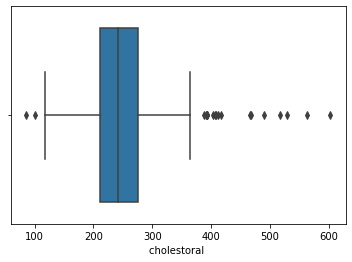

In [ ]:
# Box Plot
sns.boxplot(x=table['cholestoral ']);
plt.show()


# use plt.show() when visualing with sns

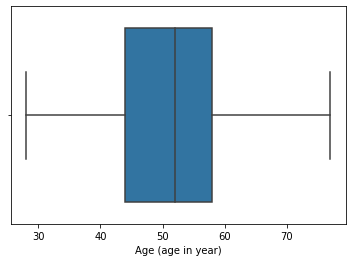

In [ ]:
# Box Plot

sns.boxplot(x=table['Age (age in year)'])
plt.show()

### Scatter plot

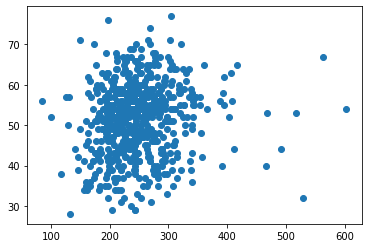

In [ ]:
# Scatter Plot

plt.scatter(x=table['cholestoral '], y=table['Age (age in year)']);

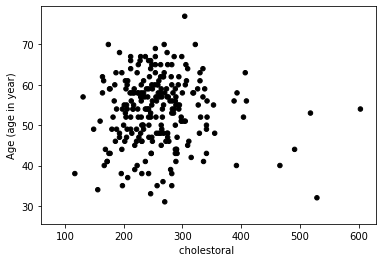

In [ ]:
# Black and White
table.plot.scatter(x='cholestoral ', y='Age (age in year)', c = table['c']);


# don't confuse .plot.scatter with plt.scatter
# the last argument means color

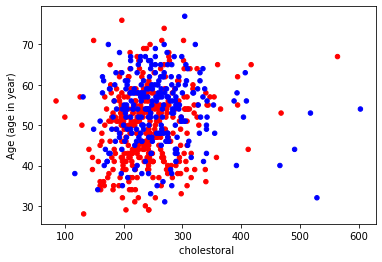

In [ ]:
# Blue and Red


# use the code below to hide pandas' warnings when you make a copy
pd.options.mode.chained_assignment = None  # default='warn'


tableCopy = table.copy();
tableCopy['color'] = tableCopy['c']
tableCopy.color[tableCopy.c == 1] = 'b'
tableCopy.color[tableCopy.c == 0] = 'r'

tableCopy.plot.scatter(x='cholestoral ', y='Age (age in year)', c = tableCopy['color']);

In [ ]:
table.head()

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0                 63    1           1           145.0         233.0   
1                 37    1           3           130.0         250.0   
2                 41    0           2           130.0         204.0   
3                 56    1           2           120.0         236.0   
4                 57    0           4           120.0         354.0   

   blood sugar  electrocardiographic   heart rate  exercise induced  \
0          1.0                    2.0       150.0               0.0   
1          0.0                    0.0       187.0               0.0   
2          0.0                    2.0       172.0               0.0   
3          0.0                    0.0       178.0               0.0   
4          0.0                    0.0       163.0               1.0   

   depression   slope   ca  thal  c  
0          2.3    3.0  0.0   6.0  0  
1          3.5    3.0  0.0   3.0  0  
2          1.4    1.0  0.0   3.0  0  
3          0.8    1.0  0.0   3.0  0  
4          0.6    1.0  0.0   3.0  0

Outlier Detection

In [ ]:
# Boxplot Logic

Q1 = table['cholestoral '].quantile(0.25)
Q3 = table['cholestoral '].quantile(0.75)

IQR = Q3 - Q1

U = table['cholestoral '] > Q3 + (1.5 * IQR)
L = table['cholestoral '] < Q1 - (1.5 * IQR)

outlier_U = table.loc[U, 'cholestoral ']
outlier_L = table.loc[L, 'cholestoral ']

print(len(outlier_U))
print(len(outlier_L))

17
2


In [ ]:
pd.DataFrame(outlier_U)

cholestoral 
28          417.0
85          564.0
96          394.0
183         468.0
210         412.0
324         394.0
421         466.0
460         409.0
483         529.0
488         392.0
491         603.0
545         518.0
553         388.0
560         404.0
573         407.0
585         393.0
595         491.0

In [ ]:
table[U]

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
28                  65    0           3           140.0         417.0   
85                  67    0           3           115.0         564.0   
96                  62    0           4           140.0         394.0   
183                 53    0           2           113.0         468.0   
210                 44    1           4           150.0         412.0   
324                 55    0           2           130.0         394.0   
421                 40    1           4           120.0         466.0   
460                 56    0           4           134.0         409.0   
483                 32    1           4           118.0         529.0   
488                 40    0           4           150.0         392.0   
491                 54    1           4           130.0         603.0   
545                 53    1           3           145.0         518.0   
553                 56    1           4           170.0         388.0   
560                 52    1           4           140.0         404.0   
573                 63    0           4           150.0         407.0   
585                 58    0           2           180.0         393.0   
595                 44    1           4           135.0         491.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
28           1.0                    2.0       157.0               0.0   
85           0.0                    2.0       160.0               0.0   
96           0.0                    2.0       157.0               0.0   
183          NaN                    0.0       127.0               0.0   
210          0.0                    0.0       170.0               0.0   
324          0.0                    2.0       150.0               0.0   
421          NaN                    0.0       152.0               1.0   
460          0.0                    2.0       150.0               1.0   
483          0.0                    0.0       130.0               0.0   
488          0.0                    0.0       130.0               0.0   
491          1.0                    0.0       125.0               1.0   
545          0.0                    0.0       130.0               0.0   
553          0.0                    1.0       122.0               1.0   
560          0.0                    0.0       124.0               1.0   
573          0.0                    2.0       154.0               0.0   
585          0.0                    0.0       110.0               1.0   
595          0.0                    0.0       135.0               0.0   

     depression   slope   ca  thal  c  
28           0.8    1.0  1.0   3.0  0  
85           1.6    2.0  0.0   7.0  0  
96           1.2    2.0  0.0   3.0  0  
183          0.0    NaN  NaN   NaN  0  
210          0.0    NaN  NaN   NaN  0  
324          0.0    NaN  NaN   NaN  0  
421          1.0    2.0  NaN   6.0  1  
460          1.9    2.0  2.0   7.0  1  
483          0.0    NaN  NaN   NaN  1  
488          2.0    2.0  NaN   6.0  1  
491          1.0    2.0  NaN   NaN  1  
545          0.0    NaN  NaN   NaN  1  
553          2.0    2.0  NaN   NaN  1  
560          2.0    2.0  NaN   NaN  1  
573          4.0    2.0  3.0   7.0  1  
585          1.0    2.0  NaN   7.0  1  
595          0.0    NaN  NaN   NaN  1

In [ ]:
len(table[U])

17

In [ ]:
AllPossibleOutliers = table[(U) | (L)]
AllPossibleOutliers
#len(AllPossibleOutliers)

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
28                  65    0           3           140.0         417.0   
85                  67    0           3           115.0         564.0   
96                  62    0           4           140.0         394.0   
183                 53    0           2           113.0         468.0   
210                 44    1           4           150.0         412.0   
215                 52    1           2           140.0         100.0   
227                 56    1           4           120.0          85.0   
324                 55    0           2           130.0         394.0   
421                 40    1           4           120.0         466.0   
460                 56    0           4           134.0         409.0   
483                 32    1           4           118.0         529.0   
488                 40    0           4           150.0         392.0   
491                 54    1           4           130.0         603.0   
545                 53    1           3           145.0         518.0   
553                 56    1           4           170.0         388.0   
560                 52    1           4           140.0         404.0   
573                 63    0           4           150.0         407.0   
585                 58    0           2           180.0         393.0   
595                 44    1           4           135.0         491.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
28           1.0                    2.0       157.0               0.0   
85           0.0                    2.0       160.0               0.0   
96           0.0                    2.0       157.0               0.0   
183          NaN                    0.0       127.0               0.0   
210          0.0                    0.0       170.0               0.0   
215          0.0                    0.0       138.0               1.0   
227          0.0                    0.0       140.0               0.0   
324          0.0                    2.0       150.0               0.0   
421          NaN                    0.0       152.0               1.0   
460          0.0                    2.0       150.0               1.0   
483          0.0                    0.0       130.0               0.0   
488          0.0                    0.0       130.0               0.0   
491          1.0                    0.0       125.0               1.0   
545          0.0                    0.0       130.0               0.0   
553          0.0                    1.0       122.0               1.0   
560          0.0                    0.0       124.0               1.0   
573          0.0                    2.0       154.0               0.0   
585          0.0                    0.0       110.0               1.0   
595          0.0                    0.0       135.0               0.0   

     depression   slope   ca  thal  c  
28           0.8    1.0  1.0   3.0  0  
85           1.6    2.0  0.0   7.0  0  
96           1.2    2.0  0.0   3.0  0  
183          0.0    NaN  NaN   NaN  0  
210          0.0    NaN  NaN   NaN  0  
215          0.0    NaN  NaN   NaN  0  
227          0.0    NaN  NaN   NaN  0  
324          0.0    NaN  NaN   NaN  0  
421          1.0    2.0  NaN   6.0  1  
460          1.9    2.0  2.0   7.0  1  
483          0.0    NaN  NaN   NaN  1  
488          2.0    2.0  NaN   6.0  1  
491          1.0    2.0  NaN   NaN  1  
545          0.0    NaN  NaN   NaN  1  
553          2.0    2.0  NaN   NaN  1  
560          2.0    2.0  NaN   NaN  1  
573          4.0    2.0  3.0   7.0  1  
585          1.0    2.0  NaN   7.0  1  
595          0.0    NaN  NaN   NaN  1

In [ ]:
# z-score Logic

Lb = table['cholestoral '].mean() - 3*table['cholestoral '].std()
Ub = table['cholestoral '].mean() + 3*table['cholestoral '].std()

AllOutliers = table[(table['cholestoral '] > Ub) | (table['cholestoral '] < Lb)]
AllOutliers

#len(AllOutliers)

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
85                  67    0           3           115.0         564.0   
183                 53    0           2           113.0         468.0   
421                 40    1           4           120.0         466.0   
483                 32    1           4           118.0         529.0   
491                 54    1           4           130.0         603.0   
545                 53    1           3           145.0         518.0   
595                 44    1           4           135.0         491.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
85           0.0                    2.0       160.0               0.0   
183          NaN                    0.0       127.0               0.0   
421          NaN                    0.0       152.0               1.0   
483          0.0                    0.0       130.0               0.0   
491          1.0                    0.0       125.0               1.0   
545          0.0                    0.0       130.0               0.0   
595          0.0                    0.0       135.0               0.0   

     depression   slope   ca  thal  c  
85           1.6    2.0  0.0   7.0  0  
183          0.0    NaN  NaN   NaN  0  
421          1.0    2.0  NaN   6.0  1  
483          0.0    NaN  NaN   NaN  1  
491          1.0    2.0  NaN   NaN  1  
545          0.0    NaN  NaN   NaN  1  
595          0.0    NaN  NaN   NaN  1

### Histogram

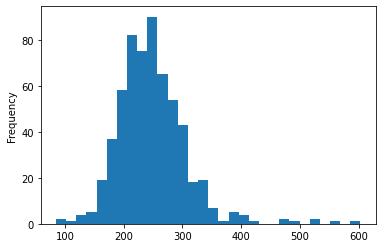

In [ ]:
table['cholestoral '].plot.hist(bins=30);

In [ ]:
#another way

ageAndChol = table[['cholestoral ', 'Age (age in year)']]

def removeOutliers(x):
  for i in ageAndChol.columns:
    if (x[i].dtypes == int) | (x[i].dtypes == float):
      L = x[i].mean() - 3*x[i].std()
      U = x[i].mean() + 3*x[i].std()
      x = x[(x[i]<U) & (x[i]>L)]
  return x

removeOutliers(ageAndChol)

#len(removeOutliers(ageAndChol))
#removeOutliers(table)



cholestoral   Age (age in year)
0           233.0                 63
1           250.0                 37
2           204.0                 41
3           236.0                 56
4           354.0                 57
..            ...                ...
591         231.0                 50
592         266.0                 52
593         288.0                 43
594         336.0                 41
596         222.0                 49

[590 rows x 2 columns]

In [ ]:
# Standardization

tableStandardized = (table['cholestoral '] - table['cholestoral '].mean()) / (table['cholestoral '].std())
tableStandardized

0     -0.262961
1      0.026983
2     -0.757573
3     -0.211795
4      1.800762
         ...   
592    0.299872
593    0.675095
594    1.493762
595    4.137375
596   -0.450573
Name: cholestoral , Length: 597, dtype: float64

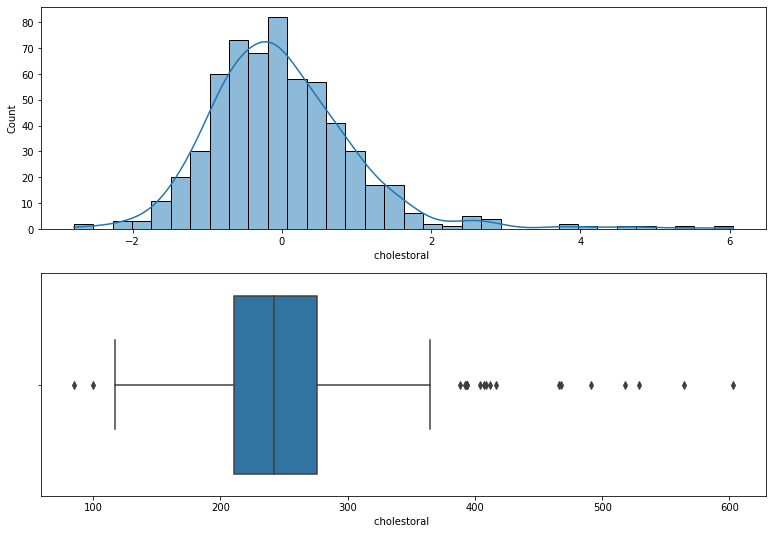

In [ ]:
from scipy.stats.morestats import yeojohnson
fig, xx = plt.subplots(nrows=2, figsize=(13,9))   # mixing plots --> .subplots()

hist_plot = sns.histplot(x = tableStandardized, ax = xx[0], kde=True);
box_plot = sns.boxplot(x = table['cholestoral '], ax = xx[1]);


# old code
#hist_plot = sns.histplot(tableStandardized, ax = xx[0], kde=True);
#box_plot = sns.boxplot(table['cholestoral '], ax = xx[1]);

# outdated
#hist_plot = sns.distplot(tableStandardized, ax = xx[0]);


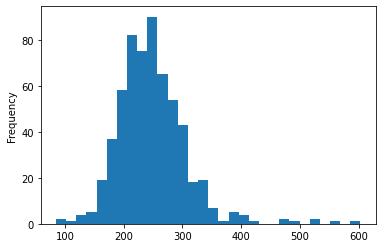

In [ ]:
# Normalization (0 < x < 1)

table['cholestoral '].plot.hist(bins = 30);

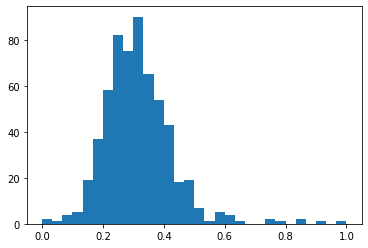

In [ ]:
xx = table['cholestoral '].values.reshape(-1,1)

scaler = MinMaxScaler()               # that's from skitlearn
scaled = scaler.fit_transform(xx)
plt.hist(scaled, bins = 30);

# (0 < x < 1)

In [ ]:
# scaler = MinMaxScaler()

tableScaled = pd.DataFrame(scaler.fit_transform(table), columns = table.columns, index = table.index)
tableScaled


Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0             0.714286  1.0    0.000000        0.490741      0.285714   
1             0.183673  1.0    0.666667        0.351852      0.318533   
2             0.265306  0.0    0.333333        0.351852      0.229730   
3             0.571429  1.0    0.333333        0.259259      0.291506   
4             0.591837  0.0    1.000000        0.259259      0.519305   
..                 ...  ...         ...             ...           ...   
592           0.489796  1.0    1.000000        0.444444      0.349421   
593           0.306122  1.0    1.000000        0.444444      0.391892   
594           0.265306  1.0    1.000000        0.259259      0.484556   
595           0.326531  1.0    1.000000        0.398148      0.783784   
596           0.428571  1.0    1.000000        0.537037      0.264479   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
0            1.0                    1.0    0.603053               0.0   
1            0.0                    0.0    0.885496               0.0   
2            0.0                    1.0    0.770992               0.0   
3            0.0                    0.0    0.816794               0.0   
4            0.0                    0.0    0.702290               1.0   
..           ...                    ...         ...               ...   
592          0.0                    0.0    0.480916               1.0   
593          0.0                    0.0    0.488550               1.0   
594          0.0                    0.0    0.358779               1.0   
595          0.0                    0.0    0.488550               0.0   
596          0.0                    0.0    0.389313               0.0   

     depression   slope   ca  thal    c  
0       0.370968    1.0  0.0  0.75  0.0  
1       0.564516    1.0  0.0  0.00  0.0  
2       0.225806    0.0  0.0  0.00  0.0  
3       0.129032    0.0  0.0  0.00  0.0  
4       0.096774    0.0  0.0  0.00  0.0  
..           ...    ...  ...   ...  ...  
592     0.322581    0.5  NaN   NaN  1.0  
593     0.322581    0.5  NaN   NaN  1.0  
594     0.483871    0.5  NaN   NaN  1.0  
595     0.000000    NaN  NaN   NaN  1.0  
596     0.322581    0.5  NaN   NaN  1.0  

[597 rows x 14 columns]

In [ ]:
# chi2 - when both X (feature) and Y (target) are nominal (or binary)

# h0 --> X and Y are indipendent
# h1 --> X and y are dependent (they have a meaningfull relationship)

# p-value < 5% --->
# probability of happening this relationship by chance is low --->
# there exists certainty in their relationship --- >
# h0 is rejected

# p-value > 5% --->
# probability of happening this relationship by chance is high -->
# there exists uncertainty in their relationship --- >
# h0 is accepted

# more chi2 ---> less p-value
# there shouldn't be null values in the data frame.

tablechi2 = table[['sex', 'chest pain', 'c']]
X = tablechi2.drop('c', axis=1)       # features
Y = tablechi2['c']                    # target

CalculateChi2 = chi2(X, Y)
CalculateChi2

# we have used:
#from sklearn.feature_selection import chi2



(array([12.81746453, 38.87974826]), array([3.43398768e-04, 4.50732473e-10]))

In [ ]:
# sort p-values

p_values = pd.Series(CalculateChi2[1], index = X.columns)
p_values.sort_values(ascending = False, inplace = True)
p_values

#CalculateChi2[0] --> chi2
#CalculateChi2[1] --> p-value

sex           3.433988e-04
chest pain    4.507325e-10
dtype: float64

### Bar Plot

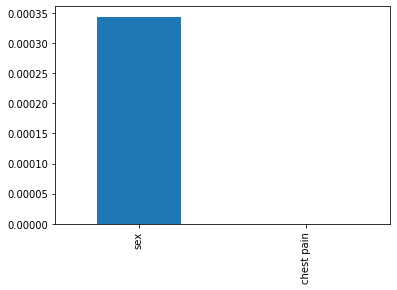

In [ ]:
p_values.plot.bar();

In [ ]:
# Duplicate data handeling

duplicateDrop = table.drop_duplicates()
print(table.shape, duplicateDrop.shape)

(597, 14) (596, 14)


In [ ]:
duplicateFinder1 = table[table.duplicated(keep = 'first')]
duplicateFinder1

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
265                 49    0           2           110.0         242.5   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
265          0.0                    0.0       160.0               0.0   

     depression   slope  ca  thal  c  
265          0.0    NaN NaN   NaN  0

In [ ]:
duplicateFinder2 = table[table.duplicated(keep = 'last')]
duplicateFinder2

Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
221                 49    0           2           110.0         242.5   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
221          0.0                    0.0       160.0               0.0   

     depression   slope  ca  thal  c  
221          0.0    NaN NaN   NaN  0

# **Visulaization**

0    352
1    245
Name: c, dtype: int64


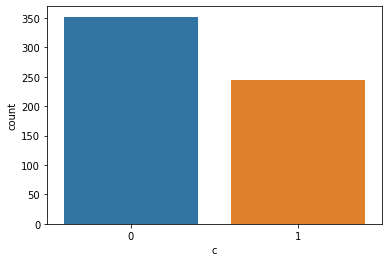

In [ ]:
print(table.c.value_counts())

x = table.c
sns.countplot(x = x);

# putting 'table.c' directly into 'sns' function will cause warning

### Heatmap

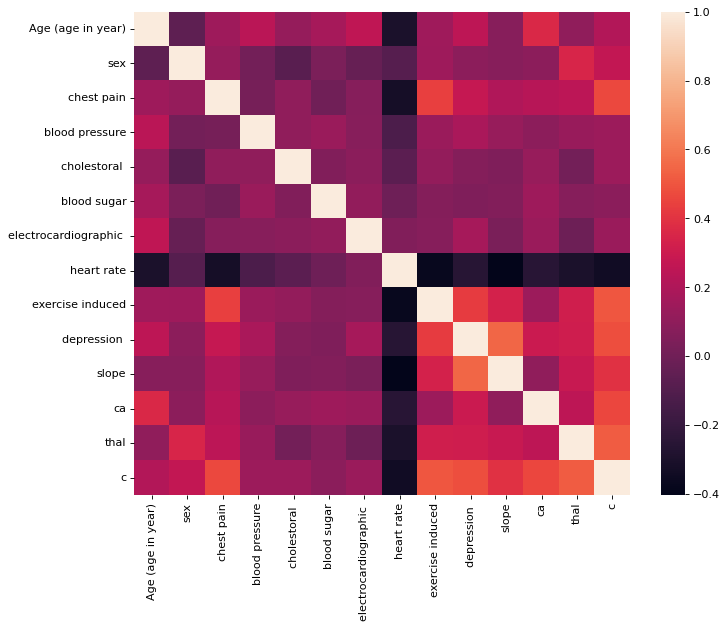

In [ ]:
# Heatmap / Correlation
corr = table.corr()

plt.figure(figsize=(10,8),
           dpi= 80)

sns.heatmap(corr);

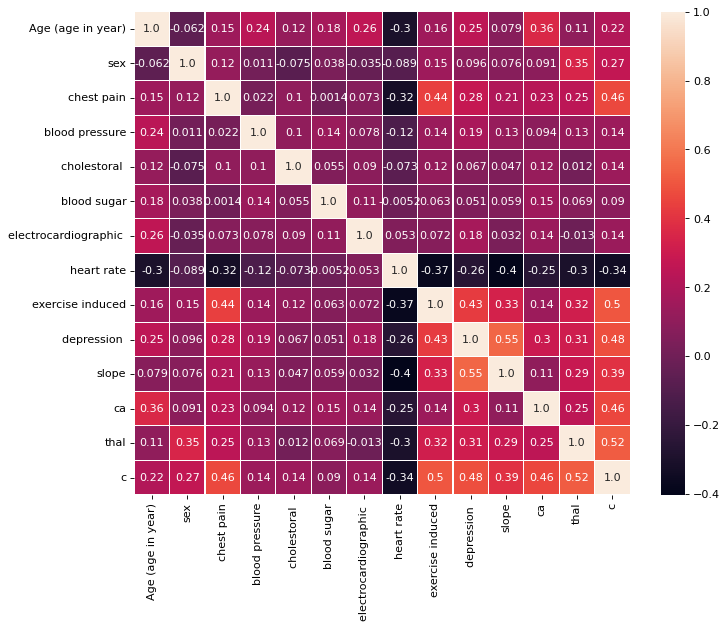

In [ ]:
# Heatmap / Correlation (more precise)

plt.figure(figsize=(10,8),
           dpi= 80)

sns.heatmap(corr,
            annot=True,
            fmt=".2",
            linewidths=.1);

# 'fmt' adds lines

2022-07-12 17:20:02,877 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-07-12 17:20:02,888 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


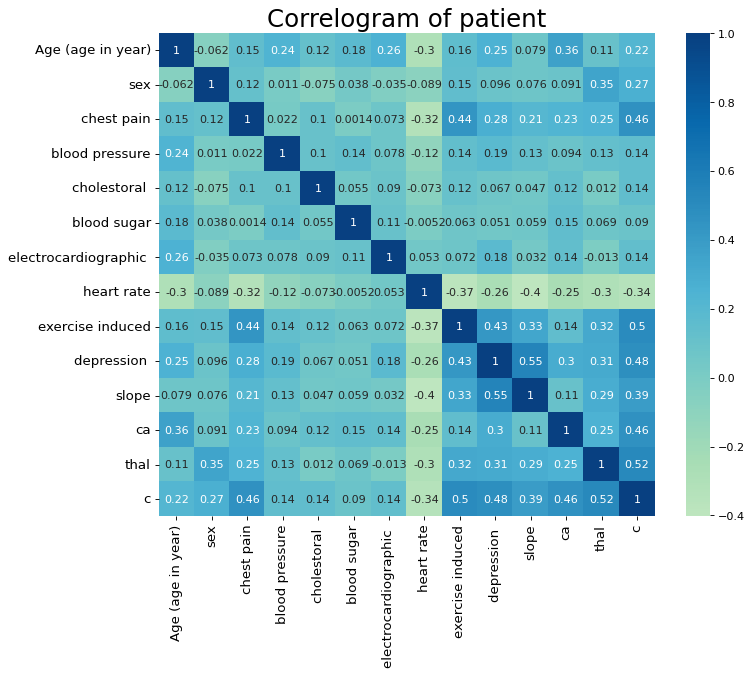

In [ ]:
# Heatmap / Correlation (more precise)

plt.figure(figsize=(10,8),
           dpi= 80)

sns.heatmap(corr ,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='GnBu',
            center=0,
            annot=True)

# Decorations
plt.title('Correlogram of patient', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

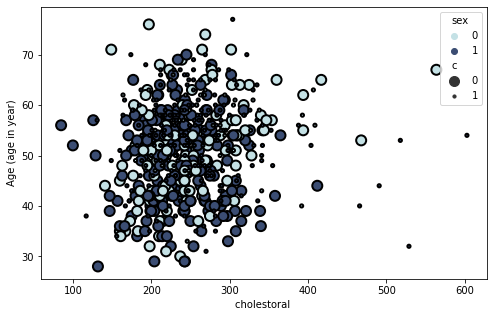

In [ ]:
# Scatterplot

plt.figure(figsize=(8,5))

sns.scatterplot(data=table,
                x="cholestoral ",
                y="Age (age in year)",
                size="c",
                palette="ch:r=-.2 , d=.3",
                hue="sex",
                sizes=(10,100),
                linewidth=2,
                edgecolor='k')

plt.show()

# d ---> darkness
# ch---> cubehelix


### Scatter Join plot

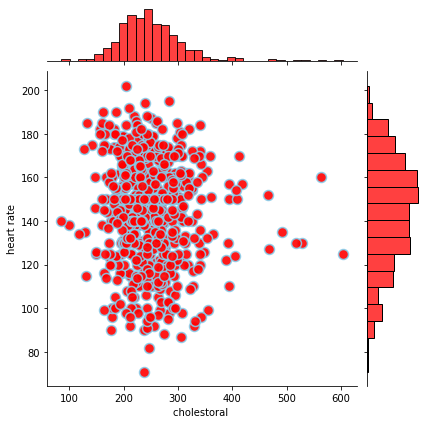

In [ ]:
# Scatterplot - more precise

sns.jointplot(x=table["cholestoral "],
              y=table["heart rate"],
              kind='scatter',
              s=100,
              color='r',
              alpha=0.9,
              edgecolor="skyblue",
              cmap="Blues",
              linewidth=1.5);


### Swarm Plot

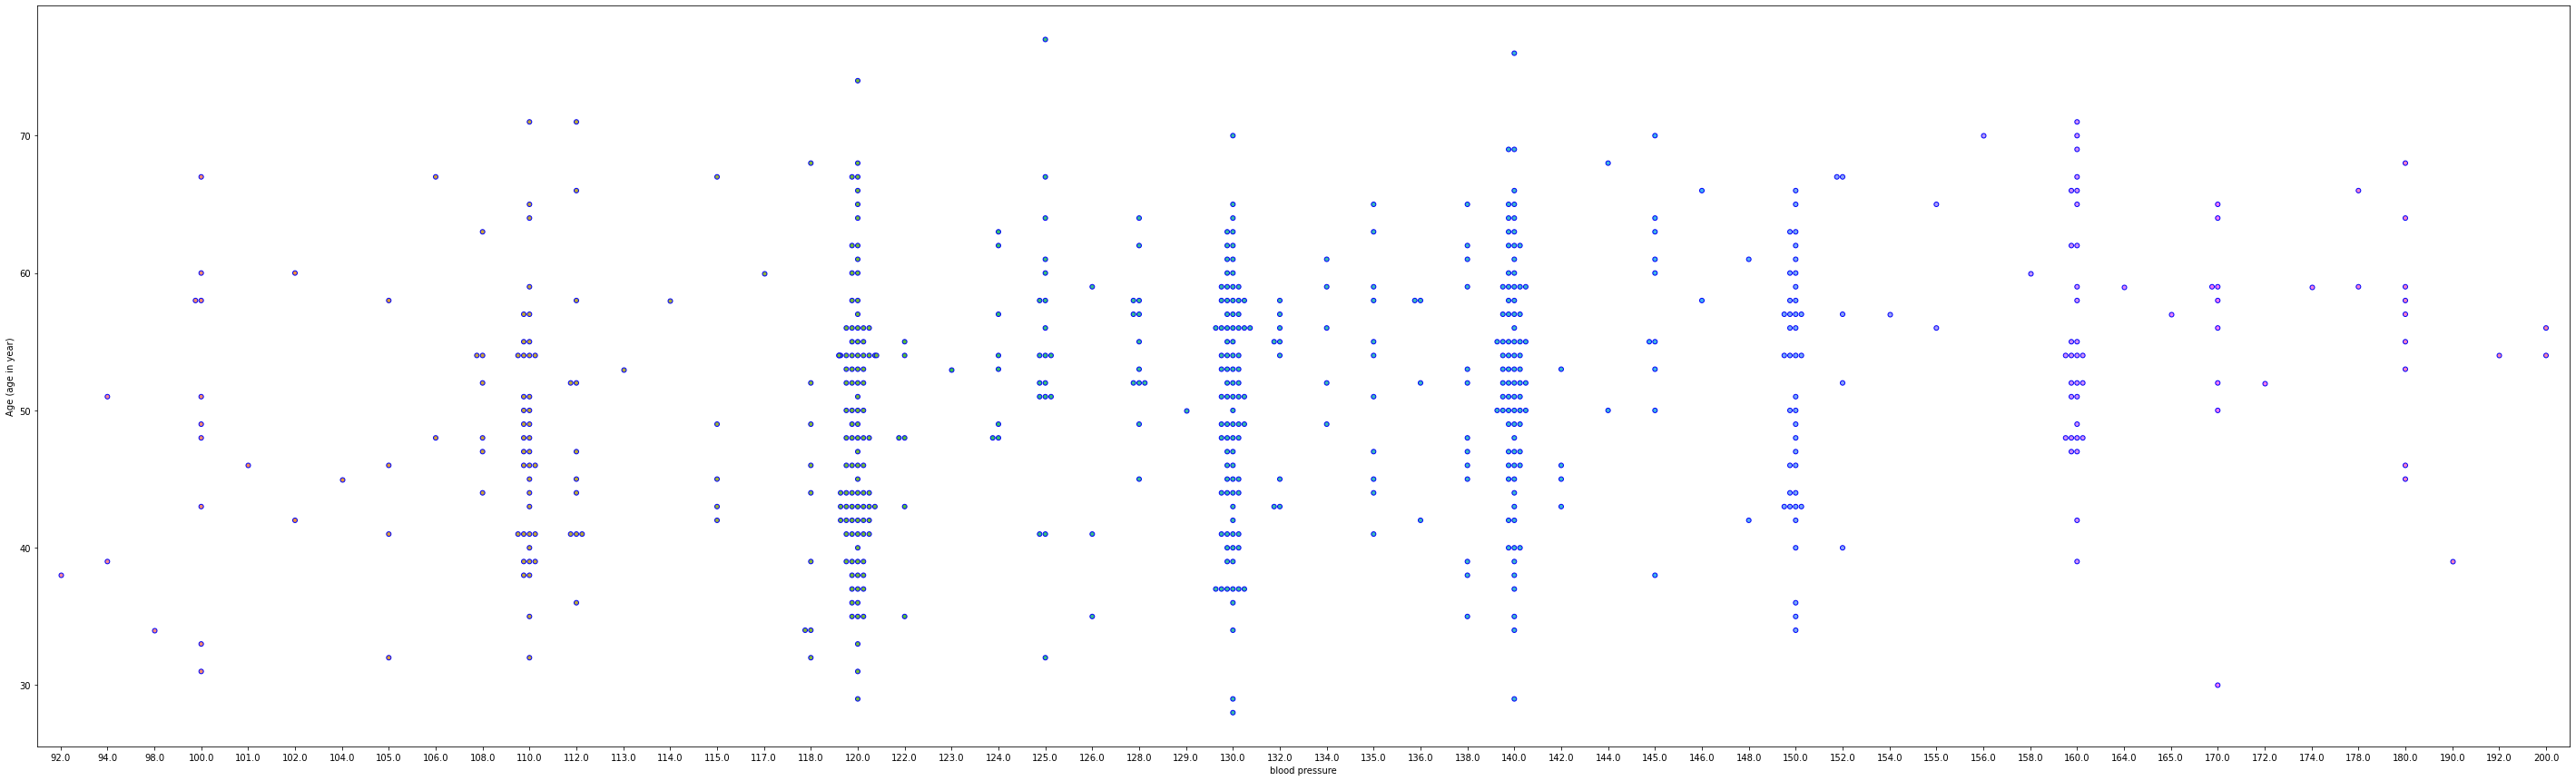

In [ ]:
# Swarmplot

plt.figure(figsize=(50,15), facecolor =  "w")

sns.swarmplot(x=table['blood pressure'],
              y=table['Age (age in year)'],
              size = 5, linewidth=1.,
              edgecolor='blue');

### Text plot

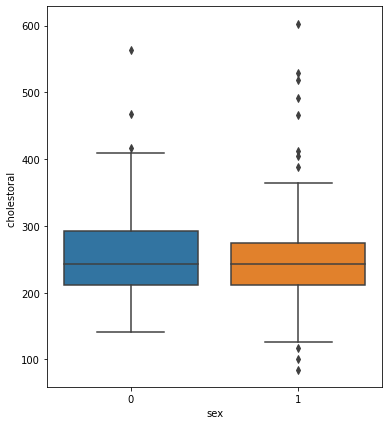

In [ ]:
# Boxplot

plt.figure(figsize=(6,7))
sns.boxplot(x=table["sex"], y=table["cholestoral "]);

### Boxplot + Swarmplot

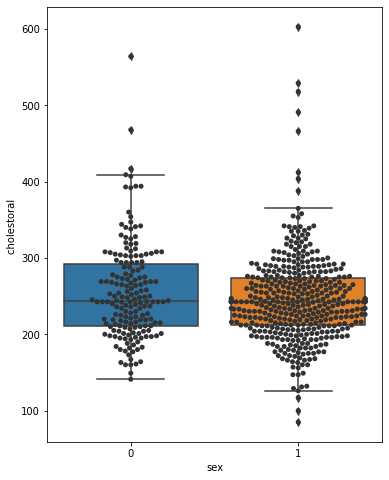

In [ ]:
# Boxplot + Swarmplot

plt.figure(figsize=(6,8))

sns.boxplot(x="sex", y="cholestoral ", data=table);
sns.swarmplot(x="sex", y="cholestoral ", data=table, color=".2");

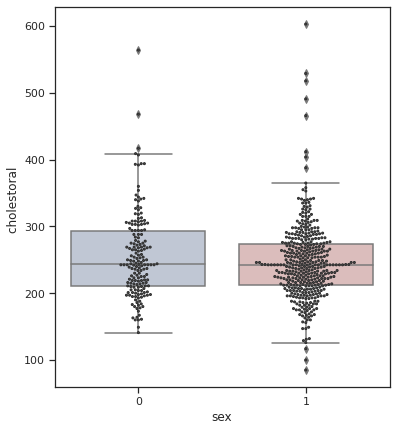

In [ ]:
plt.figure(figsize=(6,7))

sns.set(style="ticks")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="sex",
            y="cholestoral ",
            data=table,
            palette="vlag");

# Add in points to show each observation
sns.swarmplot(x="sex",
              y="cholestoral ",
              data=table,
              size=2,
              color=".3",
              linewidth=1);


### Violin plot

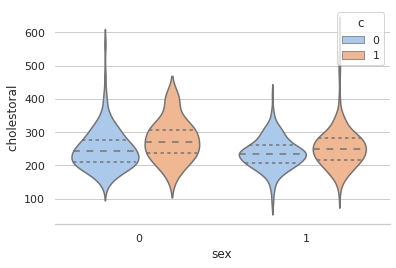

In [ ]:
# Violinplot

sns.set(style="whitegrid", palette="pastel")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="sex",
               y="cholestoral ",
               hue="c",
               split=False,
               inner="quart",
               data=table)

sns.despine(left=True) # remove axis

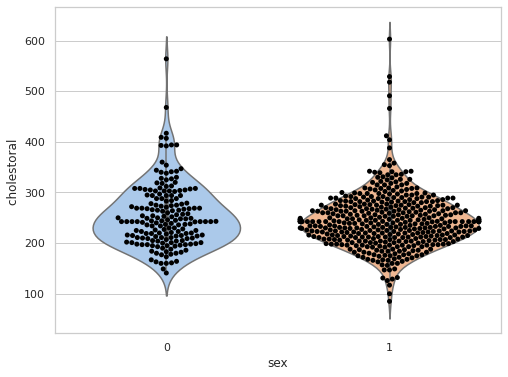

In [ ]:
# Violinplot + Swarmplot

plt.figure(figsize=(8,6) )

ax = sns.violinplot(x="sex",
                    y="cholestoral ",
                    data=table)

ax = sns.swarmplot(x="sex",
                   y="cholestoral ",
                   data=table,
                   color="black",
                   edgecolor="red",
                   s=5)

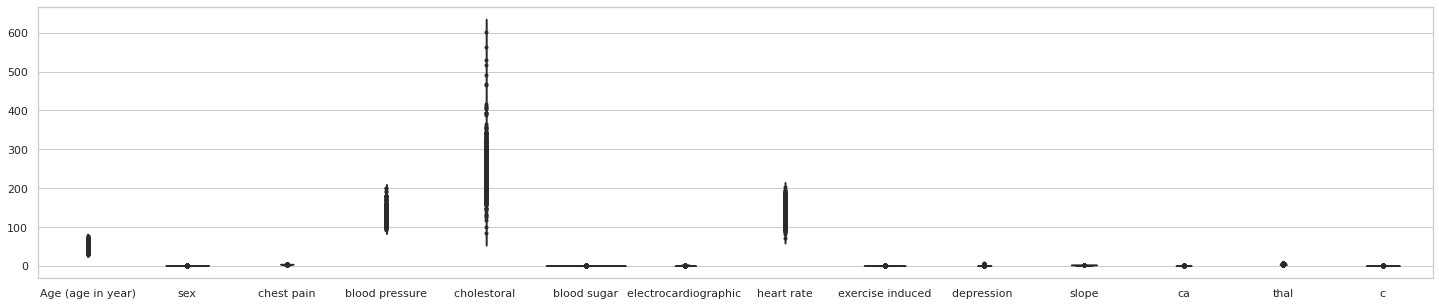

In [ ]:
plt.figure(figsize=(25,5) )


# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(rot=-.5, dark=.3)

# Show each distribution with both violins and points
sns.violinplot(data=table, palette=pal, inner="points");

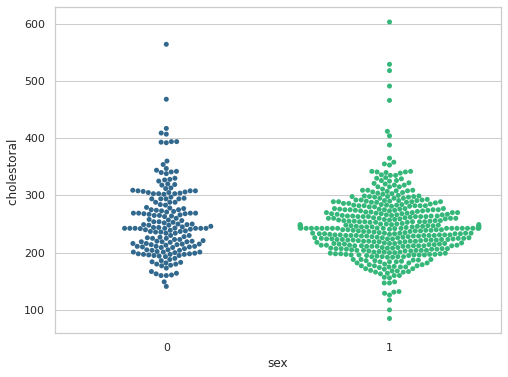

In [ ]:
plt.figure(figsize=(8,6) )

sns.set_style('whitegrid')

sns.swarmplot(x = "sex" ,
              y = "cholestoral ",
              data = table,
              palette = "viridis");

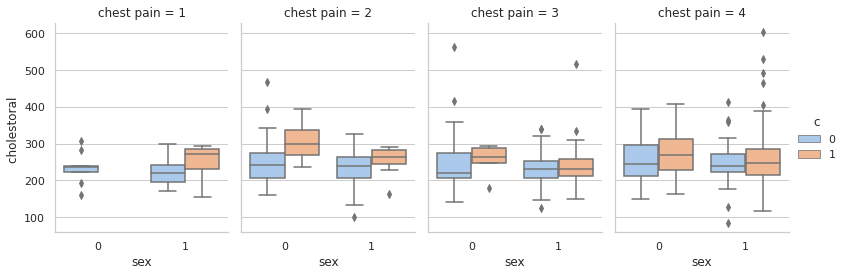

In [ ]:
G = sns.catplot(x="sex",
                y="cholestoral ",
                hue="c",
                col="chest pain",
                data=table,
                kind="box",
                height=4,
                aspect=.7)


<Figure size 800x640 with 0 Axes>

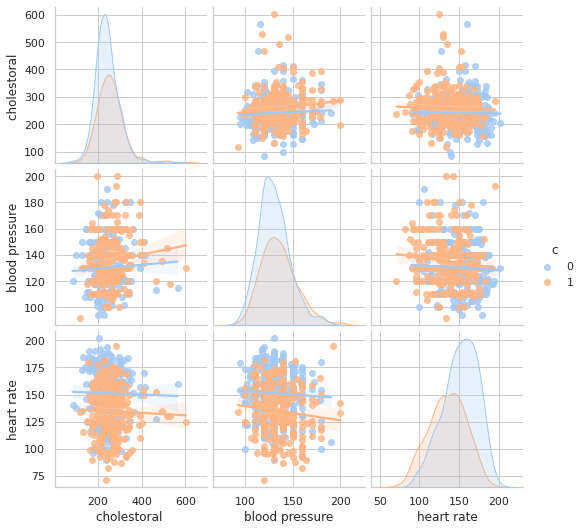

In [ ]:

plt.figure(figsize=(10,8), dpi= 80)

sns.pairplot(table,
             vars = [ "cholestoral " , "blood pressure", "heart rate"],
             kind="reg", hue="c");


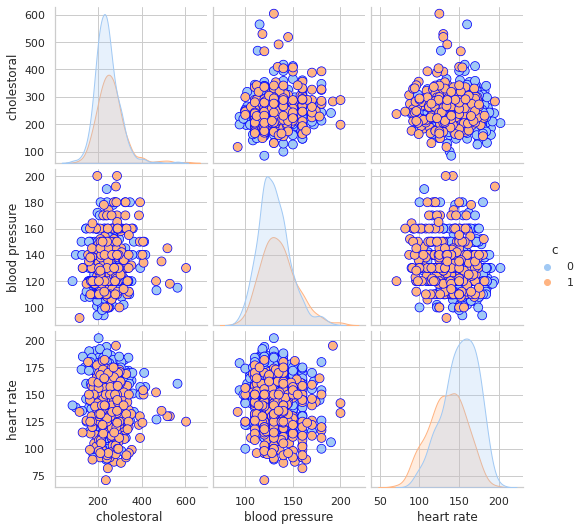

In [ ]:
sns.pairplot(table,
             vars = [ "cholestoral " , "blood pressure", "heart rate"],
             kind="scatter",
             hue="c",
             plot_kws=dict(s=80, edgecolor="blue", linewidth=.75));

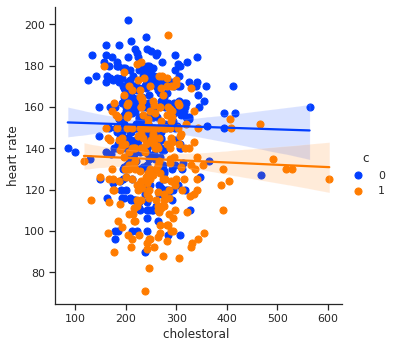

In [ ]:
sns.set(style="ticks")

sns.lmplot(x="cholestoral ",
           y="heart rate",
           hue="c",
           data=table,
           palette="bright",
           scatter_kws={"s": 50, "alpha": 1});

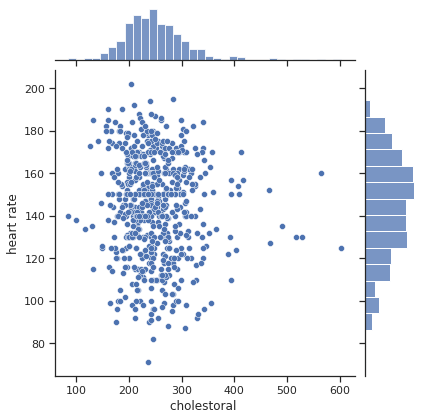

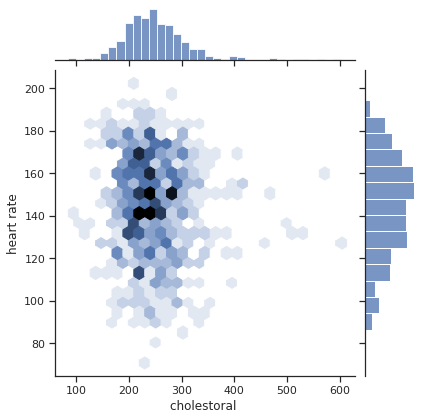

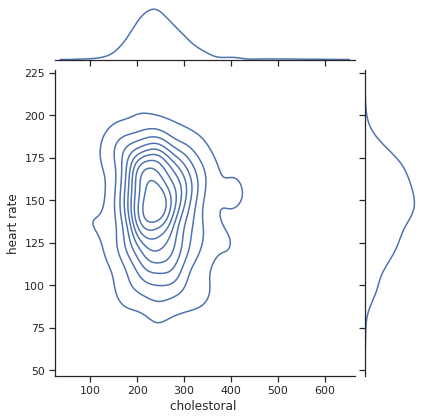

In [ ]:
sns.jointplot(x=table["cholestoral "], y=table["heart rate"], kind='scatter');
sns.jointplot(x=table["cholestoral "], y=table["heart rate"], kind='hex');
sns.jointplot(x=table["cholestoral "], y=table["heart rate"], kind='kde');

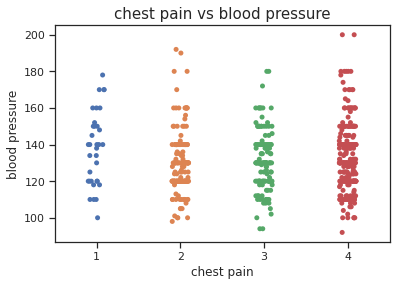

In [ ]:
# Draw Stripplot

x2 = table["chest pain"]
y2 = table["blood pressure"]
sns.stripplot(x = x2, y = y2)

# Decorations
plt.title('chest pain vs blood pressure', fontsize=15)
plt.show()

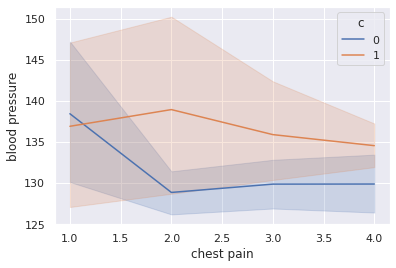

In [ ]:
sns.set(style="darkgrid")
sns.lineplot(x="chest pain", y="blood pressure",
             hue="c",
             data=table);